## TODO

* Preprocessing
* KMeans / Gaussian Mixture Clustering
* Hierarchical Clustering
* TSNE
* https://www.kaggle.com/code/ankits29/credit-card-customer-clustering-with-explanation
* https://www.kaggle.com/code/songulerdem/clustering-on-credit-card-dataset-with-pycaret
* https://machinelearningmastery.com/clustering-algorithms-with-python/
* https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [1]:
#Import Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cc_general.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Missing Data 

In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df[df['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


<AxesSubplot: >

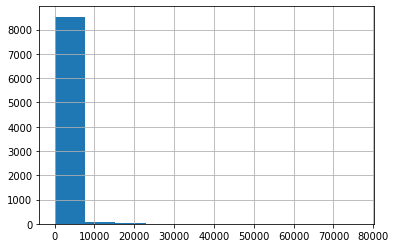

In [8]:
df['MINIMUM_PAYMENTS'].hist()

In [9]:
df['MINIMUM_PAYMENTS'].fillna(value=0, inplace=True)

In [10]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df[df['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [12]:
df = df[df['CREDIT_LIMIT'].notna()]

In [13]:
df.shape

(8949, 18)

<AxesSubplot: >

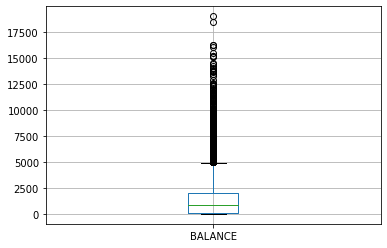

In [14]:
df[['BALANCE']].boxplot()

### DISTRIBUTIONS

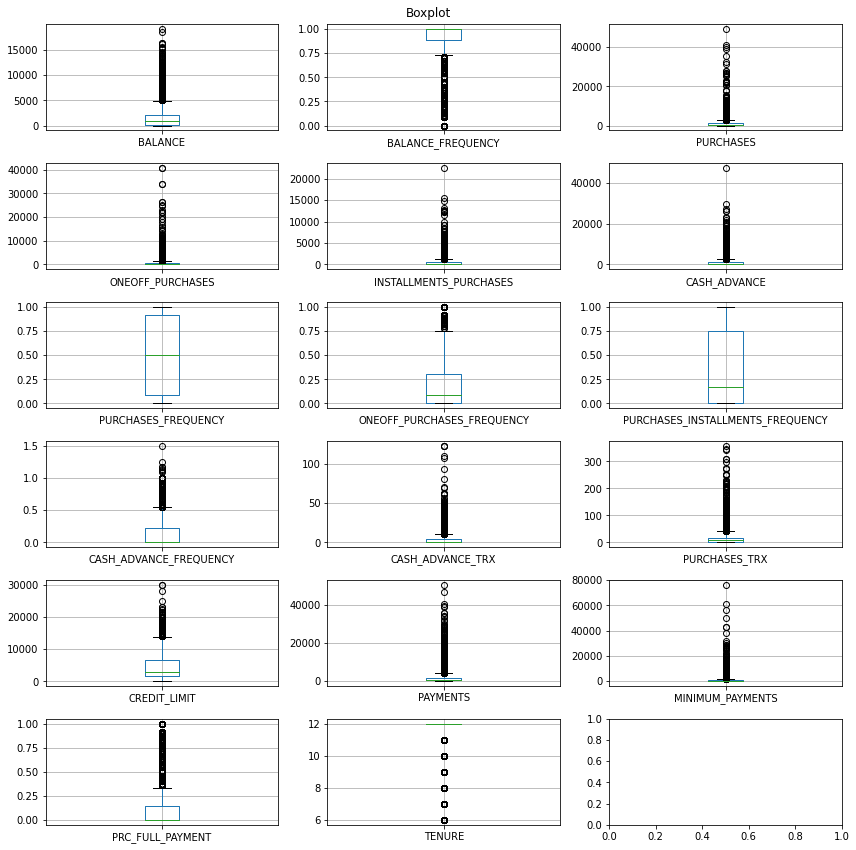

In [15]:
fig, axes = plt.subplots(6,3, figsize=(12,12))
# for i, col in enumerate(df.drop('CUST_ID', axis=1).columns):
for i, col in enumerate(df.iloc[:,1:].columns):
    df[[col]].boxplot(ax=axes[i//3,i%3])
fig.suptitle('Boxplot')
plt.tight_layout()
plt.show();

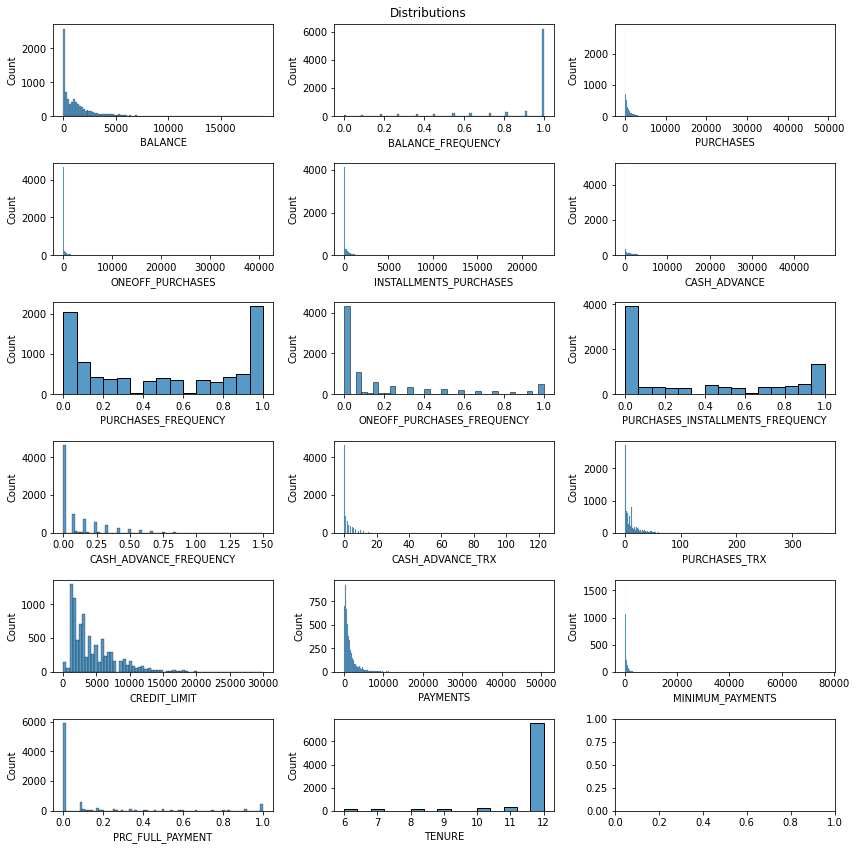

In [16]:
fig, axes = plt.subplots(6,3, figsize=(12,12))
# for i, col in enumerate(df.drop('CUST_ID', axis=1).columns):
for i, col in enumerate(df.iloc[:,1:].columns):
    sns.histplot(x=col, data=df, ax=axes[i//3,i%3])
fig.suptitle('Distributions')
plt.tight_layout()
plt.show();

### Correlations


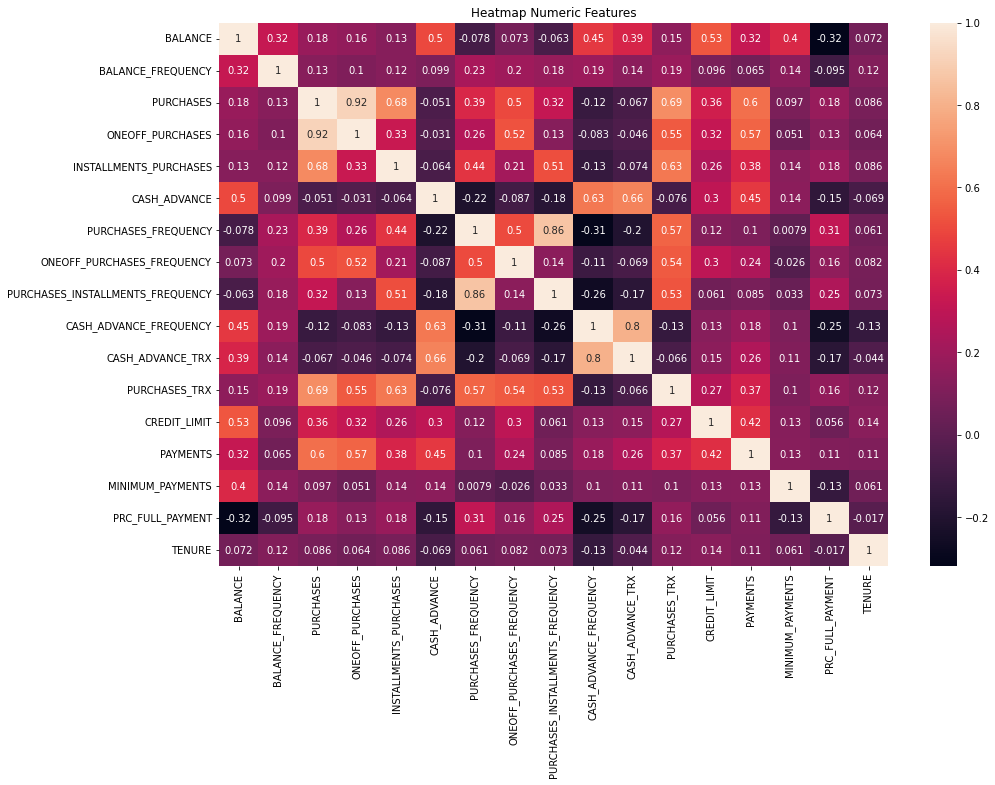

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title('Heatmap Numeric Features')
plt.xticks(rotation=90)
plt.show()

### Scaling

In [18]:
num_df = df.select_dtypes(include=np.number)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
num_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)

In [22]:
num_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.336129,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.357057,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.321774,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.333188,0.329128,-4.126919


## PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit_transform(num_df)

array([[-1.68448373, -1.07021681,  0.46999701, ..., -0.08236871,
        -0.1883782 ,  0.1492379 ],
       [-1.13256806,  2.51022238,  0.60382989, ..., -0.03313473,
        -0.73143406, -0.53341657],
       [ 0.96892569, -0.38344613,  0.08617424, ...,  0.69724759,
         0.04226508,  0.2211567 ],
       ...,
       [-0.9299003 , -1.80610887, -0.456198  , ..., -0.13979465,
         0.0987022 ,  0.45999614],
       [-2.33805631, -0.65093706,  0.98059192, ..., -0.35088336,
         0.24989537,  0.26374062],
       [-0.55837796, -0.40022244,  1.03635828, ...,  0.15584006,
         0.46653544, -0.42009534]])

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.27299297, 0.47619683, 0.56444256, 0.63924193, 0.70129269,
       0.75861993, 0.80743981, 0.85067561, 0.88848756, 0.91928847,
       0.94301416, 0.96074838, 0.9750369 , 0.98720329, 0.99732873])

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(num_df)

In [26]:
num_df.shape

(8949, 17)

In [27]:
components.shape

(8949, 2)

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


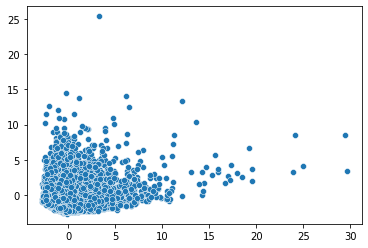

In [28]:
component1 = components[:,0]
component2 = components[:,1]
sns.scatterplot(component1, component2);

# Hierarchical Clustering

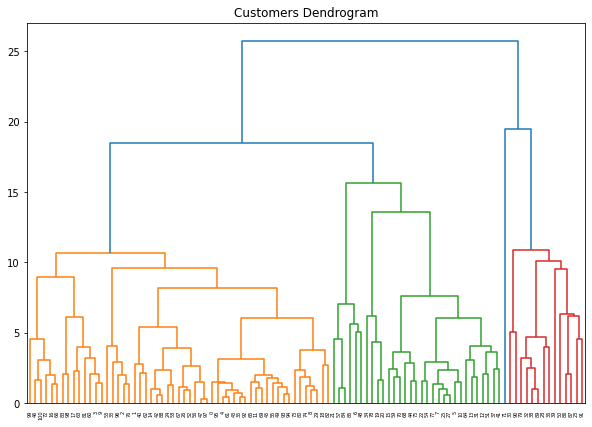

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = linkage(num_df.loc[:100, :], 
            method='ward', 
            metric="euclidean")
dendrogram(Z=clusters)
plt.show()

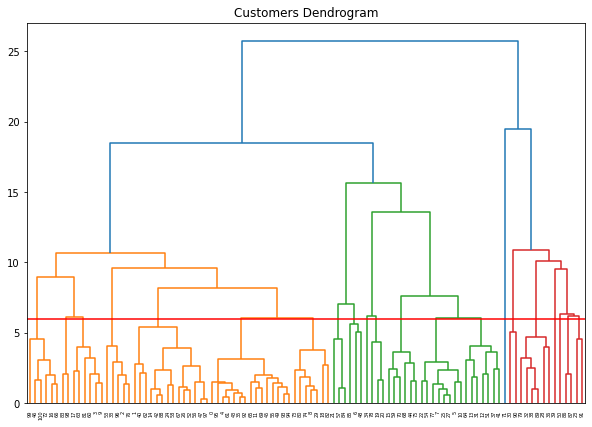

In [30]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = linkage(num_df.loc[:100, :], 
            method='ward', 
            metric="euclidean")
dendrogram(Z=clusters)
plt.axhline(y = 6, color = 'r', linestyle = '-')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clustering_model.fit(num_df)
clustering_model.labels_

array([8, 0, 5, ..., 2, 2, 2], dtype=int64)

In [32]:
clustering_model.labels_.shape

(8949,)

In [33]:
pd.Series(clustering_model.labels_).value_counts().sort_values(ascending=False)

8    2448
1    1429
6    1379
0    1292
5    1126
2     748
3     303
9     108
4      93
7      23
dtype: int64

In [34]:
df['clusters'] = clustering_model.labels_

In [35]:
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,3328.678962,1.000000,193.780,0.00,0.000,2734.662758,0.166667,0.00,0.000000,0.416667,10.0,3.0,6000.0,1682.144531,1097.107200,0.000000,12.0
1,190.570683,1.000000,639.000,0.00,521.640,0.000000,1.000000,0.00,0.916667,0.000000,0.0,14.0,2500.0,729.334233,184.464721,0.083333,12.0
2,746.625908,0.900000,238.825,0.00,58.360,428.942533,0.550506,0.00,0.211111,0.125000,2.0,6.0,1500.0,366.303334,195.879433,0.000000,8.0
3,2901.999862,1.000000,5855.460,3802.21,1442.230,0.000000,1.000000,0.75,0.833333,0.000000,0.0,66.0,9000.0,4807.552996,889.957080,0.000000,12.0
4,2128.151695,1.000000,162.560,0.00,100.000,19.042417,0.333333,0.00,0.250000,0.083333,1.0,6.0,2100.0,359.886515,12748.983060,0.000000,12.0
5,521.925704,1.000000,1969.585,1218.13,449.985,0.000000,1.000000,0.75,0.583333,0.000000,0.0,28.0,6000.0,1849.435107,210.302181,0.083333,12.0
6,28.349518,0.363636,150.450,0.00,0.000,0.000000,0.166667,0.00,0.000000,0.000000,0.0,3.0,3000.0,401.109047,98.767606,0.000000,12.0
7,3391.702180,1.000000,26402.390,21802.60,4732.290,0.000000,1.000000,1.00,0.916667,0.000000,0.0,101.0,17000.0,26652.344320,1149.747342,0.583333,12.0
8,1154.766700,1.000000,90.005,0.00,0.000,144.266295,0.083333,0.00,0.000000,0.083333,1.0,1.0,2500.0,619.157236,401.809695,0.000000,12.0


Cluster 7 has clients with highest limit, and credit card usage, and use installments frequently

## KMEANS

Use Kmeans Clustering methods to find segments

In [36]:
from sklearn.cluster import KMeans

In [37]:
from sklearn.metrics import silhouette_score
k_range = list(range(2,11))
silhouette_coefficients = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(num_df)
    score = silhouette_score(num_df, km.labels_)
    silhouette_coefficients.append(score)

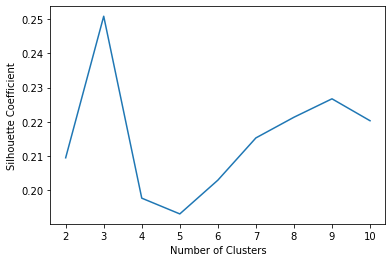

In [38]:
plt.plot(k_range, silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [39]:
km = KMeans(n_clusters=3)

In [40]:
km.fit(num_df)

KMeans(n_clusters=3)

In [41]:
df['clusters'] = km.labels_

In [42]:
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,3462.475340,1.0,0.000,0.000,0.000,3096.807933,0.000000,0.00,0.000000,0.416667,10.0,0.0,6000.0,1648.570068,1092.737436,0.000000,12.0
1,424.889021,1.0,304.300,0.000,78.400,0.000000,0.416667,0.00,0.166667,0.000000,0.0,6.0,2500.0,569.773913,202.961709,0.000000,12.0
2,1234.643550,1.0,3133.435,1795.275,1090.335,0.000000,1.000000,0.75,0.916667,0.000000,0.0,44.0,7000.0,2769.688042,373.959741,0.083333,12.0


In [43]:
df['clusters'].value_counts()

1    6120
0    1597
2    1232
Name: clusters, dtype: int64

## TODO: GMM 
* https://neptune.ai/blog/k-means-clustering

## DBSCAN

In [44]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

In [45]:
dbscan_model.fit(num_df)

DBSCAN(eps=0.25, min_samples=9)

In [46]:
dbscan_res = dbscan_model.fit_predict(num_df)

In [47]:
len(dbscan_res)

8949

In [48]:
dbscan_clstrs = np.unique(dbscan_res)
dbscan_clstrs

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [49]:
df['clusters'] = dbscan_res
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
-1,840.144184,1.000000,401.160,55.000,108.00,0.000000,0.500000,0.083333,0.25,0.000000,0.0,8.0,3500.0,922.698832,283.938453,0.0,12.0
0,938.217609,1.000000,55.000,55.000,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0.0,1.0,1200.0,318.898993,326.627723,0.0,12.0
1,1274.369733,1.000000,0.000,0.000,0.00,120.625134,0.000000,0.000000,0.00,0.083333,1.0,0.0,1500.0,359.798169,405.280137,0.0,12.0
2,449.026889,1.000000,325.920,0.000,325.92,0.000000,1.000000,0.000000,1.00,0.000000,0.0,12.0,1000.0,294.181491,217.449281,0.0,12.0
3,1141.920464,1.000000,46.935,46.935,0.00,65.854210,0.083333,0.083333,0.00,0.083333,1.0,1.0,1200.0,381.375886,460.900758,0.0,12.0
4,1273.731635,1.000000,0.000,0.000,0.00,172.931118,0.000000,0.000000,0.00,0.166667,2.0,0.0,1500.0,397.461163,362.308201,0.0,12.0
5,5.952015,0.181818,72.500,72.500,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0.0,1.0,1500.0,225.240137,64.306660,0.0,12.0
6,1266.243481,1.000000,0.000,0.000,0.00,148.849272,0.000000,0.000000,0.00,0.250000,3.0,0.0,1500.0,338.415809,419.545513,0.0,12.0
7,1100.505764,1.000000,124.650,124.650,0.00,0.000000,0.166667,0.166667,0.00,0.000000,0.0,2.0,1200.0,446.088328,356.432463,0.0,12.0


### Silhouette Score DBSCAN 

In [50]:
silhouette_score(num_df, dbscan_res)

-0.4124535145003281

### Silhouette Score KMeans 

In [51]:
silhouette_score(num_df, km.labels_)

0.2507186093813761

### Silhouette Score Hierarchical Clustering

In [53]:
silhouette_score(num_df, clustering_model.labels_)

0.16305183387834213

## Gaussian Mixture 

In [54]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4)

In [56]:
gm.fit(num_df)

GaussianMixture(n_components=4)

In [57]:
labels = gm.predict(num_df)

In [58]:
df['clusters'] = labels
df.groupby('clusters').agg('median')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
clusters,,,,,,,,,,,,,,,,,
0,1381.514061,1.0,0.000,0.000,0.000,1103.566466,0.000000,0.000000,0.000000,0.166667,3.0,0.0,3000.0,712.739894,440.996796,0.0,12.0
1,161.977225,1.0,582.895,149.985,256.455,0.000000,0.750000,0.083333,0.500000,0.000000,0.0,12.0,3000.0,669.314320,175.114213,0.0,12.0
2,2377.742667,1.0,3030.330,1300.480,975.790,258.954597,1.000000,0.416667,0.833333,0.083333,1.0,41.0,6500.0,3632.719723,1366.869273,0.0,12.0
3,1684.705035,1.0,522.130,229.000,141.580,1057.519449,0.571429,0.166667,0.333333,0.250000,4.0,9.0,3500.0,1186.855827,717.913829,0.0,12.0


In [59]:
silhouette_score(num_df, labels)

0.07988489300252986

In [60]:
df['clusters'].value_counts()

1    4132
0    2252
3    1846
2     719
Name: clusters, dtype: int64

In [63]:
silhouette_coefficients = []
k_range = list(range(2,11))
for k in k_range:
    gm = GaussianMixture(n_components=k)
    gm.fit(num_df)
    score = silhouette_score(num_df, gm.predict(num_df))
    silhouette_coefficients.append(score)

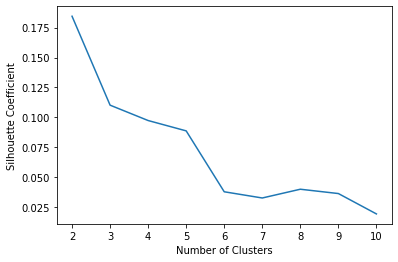

In [64]:
plt.plot(k_range, silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()